In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('donnees_OCDE.csv')
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,KOR,QGDP,TOT,PC_CHGPP,Q,2015-Q1,0.857087,NaN
1,KOR,QGDP,TOT,PC_CHGPP,Q,2015-Q2,0.407245,NaN
2,KOR,QGDP,TOT,PC_CHGPP,Q,2015-Q3,1.468999,NaN
3,KOR,QGDP,TOT,PC_CHGPP,Q,2015-Q4,0.720414,NaN
4,KOR,QGDP,TOT,PC_CHGPP,Q,2016-Q1,0.285962,NaN
...,...,...,...,...,...,...,...,...
215,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q2,0.245806,NaN
216,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q3,0.154693,NaN
217,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q4,-0.196375,NaN
218,FRA,QGDP,TOT,PC_CHGPP,Q,2020-Q1,-5.871508,NaN


In [3]:
df=df[['LOCATION','TIME','Value']].copy()
df

,LOCATION,TIME,Value
0,KOR,2015-Q1,0.857087
1,KOR,2015-Q2,0.407245
2,KOR,2015-Q3,1.468999
3,KOR,2015-Q4,0.720414
4,KOR,2016-Q1,0.285962
...,...,...,...
215,FRA,2019-Q2,0.245806
216,FRA,2019-Q3,0.154693
217,FRA,2019-Q4,-0.196375
218,FRA,2020-Q1,-5.871508


In [4]:
pays=df[['LOCATION']]
pays=pays.drop_duplicates(keep='first')
pays

,LOCATION
0,KOR
22,GBR
44,JPN
66,CAN
88,USA
110,IND
132,DEU
154,ITA
176,CHN
198,FRA


In [5]:
kor=df.loc[df['LOCATION']=='KOR',:]
kor

,LOCATION,TIME,Value
0,KOR,2015-Q1,0.857087
1,KOR,2015-Q2,0.407245
2,KOR,2015-Q3,1.468999
3,KOR,2015-Q4,0.720414
4,KOR,2016-Q1,0.285962
5,KOR,2016-Q2,1.126822
6,KOR,2016-Q3,0.443510
7,KOR,2016-Q4,0.762716
8,KOR,2017-Q1,0.816716
9,KOR,2017-Q2,0.691752


In [6]:
moy_kor=kor['Value'].mean()
moy_kor

0.4555230927727273

In [7]:
var_kor=kor['Value'].var()
var_kor

1.0301041774107598

In [8]:
std_kor=kor['Value'].std()
std_kor

1.0149404797379793

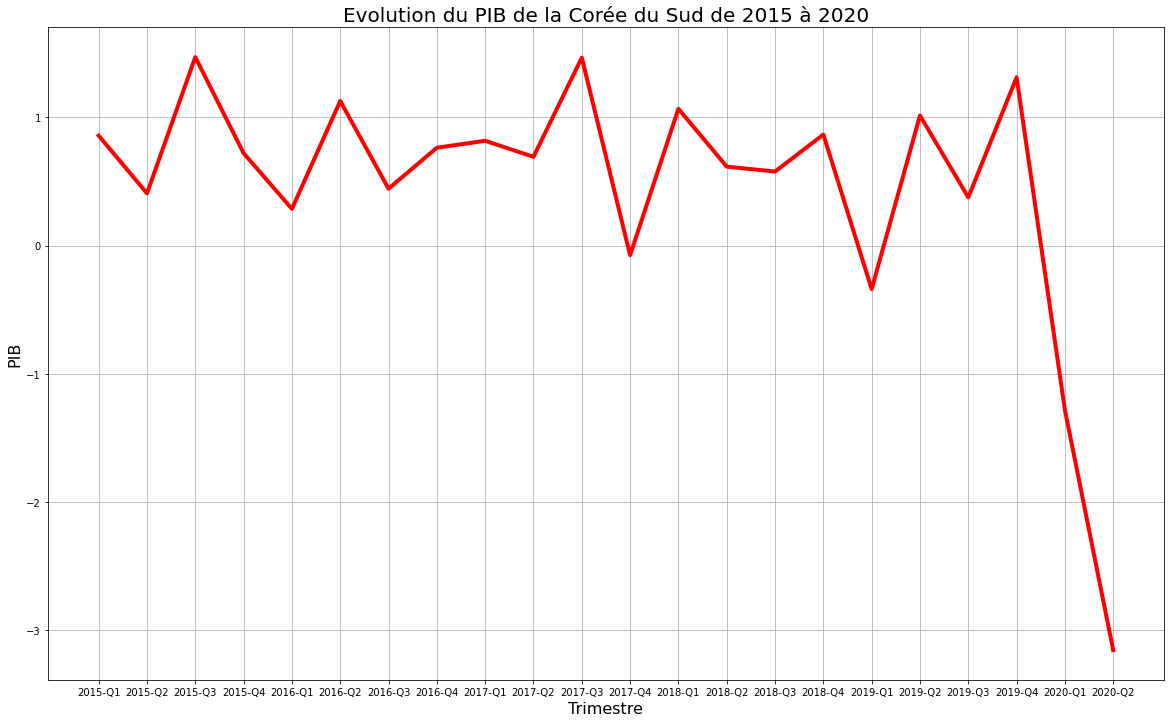

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))

plt.plot(kor['TIME'], kor['Value'], color='red', linewidth=4, markersize=10)


plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('PIB', fontsize=16)

plt.grid(True)
plt.title('Evolution du PIB de la Corée du Sud de 2015 à 2020', fontsize=20)
plt.show()

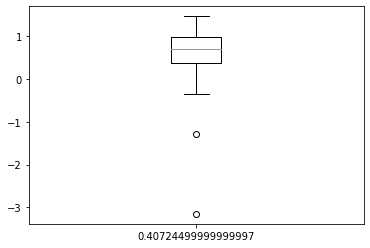

In [10]:
fig = plt.figure()
plt.xticks([0], kor['Value'])
plt.boxplot(kor['Value'])
plt.savefig('BoxPlot.png', bbox_inches='tight')
plt.show()

In [11]:
listePays = list(set(df['LOCATION']))
listePays

['IND', 'DEU', 'FRA', 'KOR', 'CHN', 'GBR', 'ITA', 'JPN', 'USA', 'CAN']

In [12]:
listeDonnee=[]
listeDate = []
listeMM = []
for p in listePays:
    df1=df.loc[df['LOCATION']==p,:]
    a = df1['Value'].values.tolist()
    b = df1['TIME'].values.tolist()
    c = df1.rolling(3,min_periods=2).mean()
    listeDonnee.append(a)
    listeDate.append(b)
    listeMM.append(c)

In [13]:
listeDonnee

[[1.6884400000000002,
  2.14787,
  1.8462,
  2.026252,
  2.874396,
  1.885515,
  1.9879689999999999,
  1.432815,
  1.238499,
  1.8944889999999999,
  1.924841,
  1.9390180000000001,
  1.641989,
  1.324898,
  1.39794,
  1.17275,
  1.41451,
  0.90548,
  0.83647,
  0.8609549999999999,
  0.65894,
  -25.2481],
 [-0.50485313,
  0.7169497420000001,
  0.43111931200000003,
  0.469202031,
  0.866992251,
  0.394052456,
  0.245315463,
  0.38175080299999997,
  1.228669341,
  0.65504338,
  0.88046779,
  0.834829631,
  -0.206973575,
  0.47138743200000005,
  -0.328427895,
  0.33892147200000006,
  0.612222858,
  -0.503593062,
  0.309311452,
  -0.018690252,
  -2.018693573,
  -9.690955512],
 [0.525391125,
  -0.03594914,
  0.346526802,
  0.11247580900000001,
  0.703652642,
  -0.247920928,
  0.231724299,
  0.58143563,
  0.816627663,
  0.710581771,
  0.700569168,
  0.847812212,
  0.143630169,
  0.190998158,
  0.369879119,
  0.6530642170000001,
  0.545805518,
  0.245805777,
  0.15469301400000002,
  -0.1963748

In [14]:
listeDate

[['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q

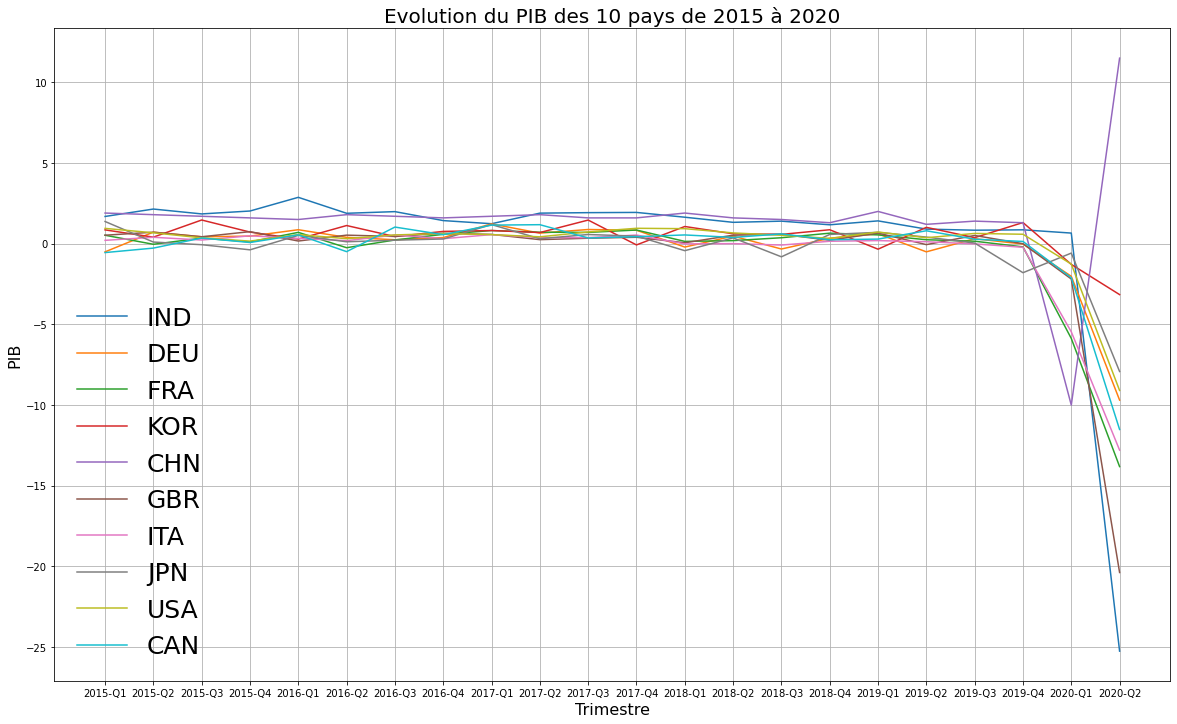

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))

for d,v,p in zip(listeDate, listeDonnee, listePays) :
    plt.plot(d,v,label=p)
    

plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('PIB', fontsize=16)

plt.grid(True)
plt.legend(loc='best',markerscale = 5, frameon = False,  prop={"size":25})
plt.title('Evolution du PIB des 10 pays de 2015 à 2020', fontsize=20)
plt.show()

In [16]:
mm=kor.rolling(3,min_periods=2).mean()
mm

,Value
0,NaN
1,0.632166
2,0.911110
3,0.865553
4,0.825125
5,0.711066
6,0.618765
7,0.777683
8,0.674314
9,0.757061


In [17]:
kor['MM']=mm

C:\Users\anais\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
kor

,LOCATION,TIME,Value,MM
0,KOR,2015-Q1,0.857087,NaN
1,KOR,2015-Q2,0.407245,0.632166
2,KOR,2015-Q3,1.468999,0.911110
3,KOR,2015-Q4,0.720414,0.865553
4,KOR,2016-Q1,0.285962,0.825125
5,KOR,2016-Q2,1.126822,0.711066
6,KOR,2016-Q3,0.443510,0.618765
7,KOR,2016-Q4,0.762716,0.777683
8,KOR,2017-Q1,0.816716,0.674314
9,KOR,2017-Q2,0.691752,0.757061


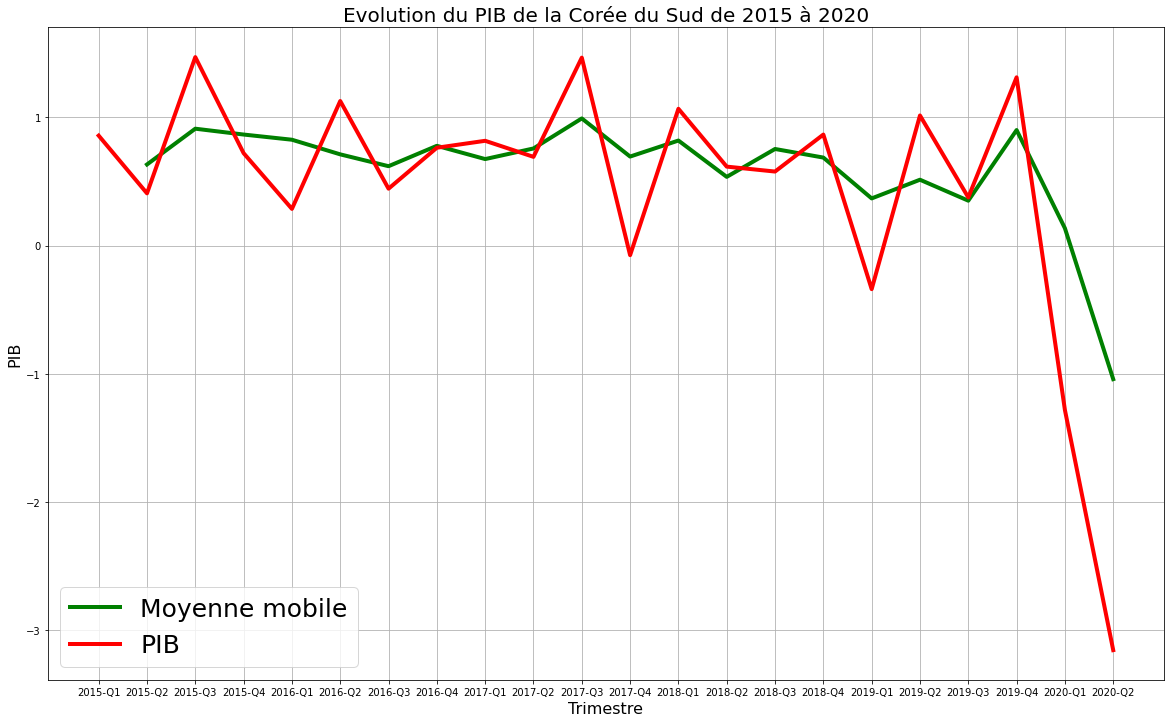

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))

plt.plot(kor['TIME'], kor['MM'], color='green',label='Moyenne mobile', linewidth=4, markersize=10)
plt.plot(kor['TIME'], kor['Value'], color='red',label='PIB', linewidth=4, markersize=10)


plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('PIB', fontsize=16)
plt.legend(prop={"size":25})
plt.grid(True)
plt.title('Evolution du PIB de la Corée du Sud de 2015 à 2020', fontsize=20)
plt.show()

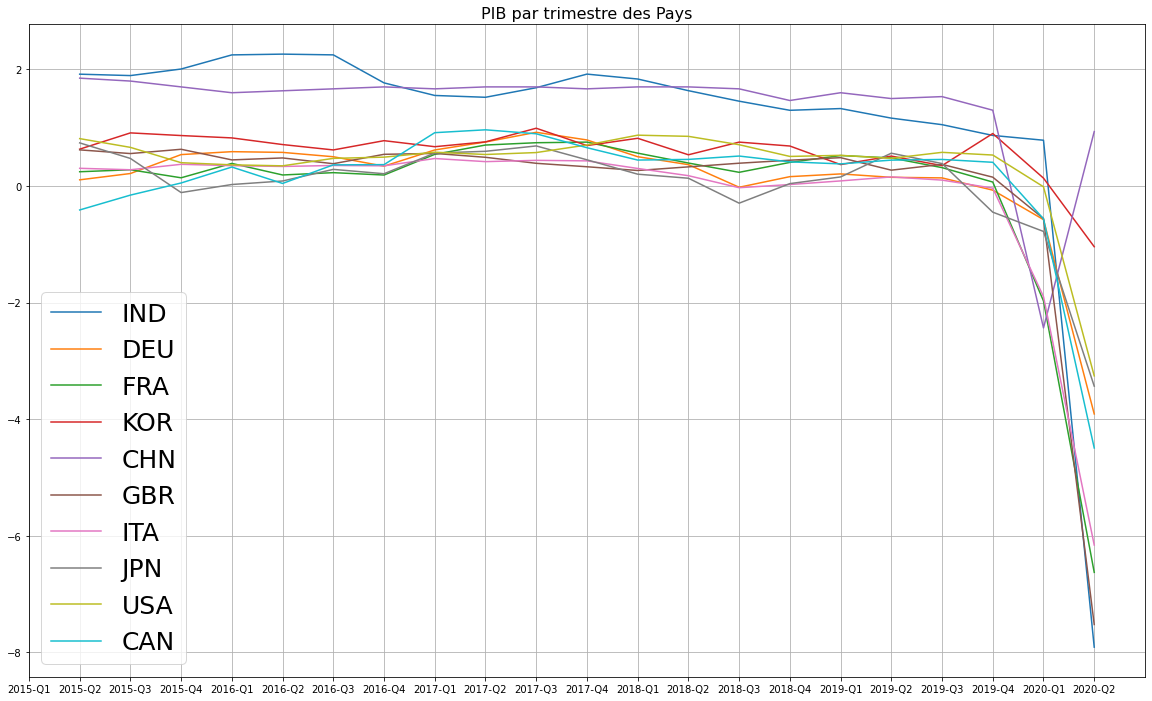

In [44]:
plt.figure(figsize=(20,12))
for d,mm,p in zip(listeDate,listeMM, listePays) :
    plt.plot(d,mm,label=p)

plt.legend(prop={"size":25})
plt.title('PIB par trimestre des Pays', fontsize=16)
plt.grid(True)
plt.show()

In [21]:
vm=kor.rolling(3,min_periods=2).var()
vm

,Value,MM
0,NaN,NaN
1,0.101179,NaN
2,0.284019,0.038905
3,0.297629,0.022392
4,0.358117,0.001851
5,0.176827,0.006418
6,0.199797,0.010686
7,0.116897,0.006369
8,0.040682,0.006504
9,0.003928,0.002993


In [22]:
listeVariance=[]
for p in listePays:
    df1=df.loc[df['LOCATION']==p,:]
    d = df1.rolling(3,min_periods=2).var()
    listeVariance.append(d)

In [23]:
listeVariance

[          Value
 110         NaN
 111    0.105538
 112    0.054495
 113    0.023036
 114    0.301492
 115    0.286173
 116    0.295689
 117    0.087272
 118    0.151277
 119    0.113537
 120    0.150385
 121    0.000518
 122    0.028072
 123    0.094319
 124    0.027574
 125    0.013199
 126    0.018239
 127    0.064832
 128    0.099667
 129    0.001224
 130    0.012154
 131  225.483047,
          Value
 132        NaN
 133   0.746401
 134   0.408424
 135   0.024088
 136   0.058279
 137   0.064593
 138   0.105379
 139   0.006815
 140   0.283812
 141   0.186834
 142   0.083518
 143   0.014204
 144   0.378328
 145   0.279603
 146   0.185772
 147   0.183768
 148   0.234145
 149   0.338262
 150   0.332936
 151   0.167255
 152   1.587868
 153  26.069389,
          Value
 198        NaN
 199   0.157551
 200   0.082231
 201   0.037183
 202   0.088635
 203   0.230811
 204   0.226378
 205   0.173365
 206   0.086621
 207   0.013873
 208   0.004136
 209   0.006769
 210   0.137956
 211   0.154920

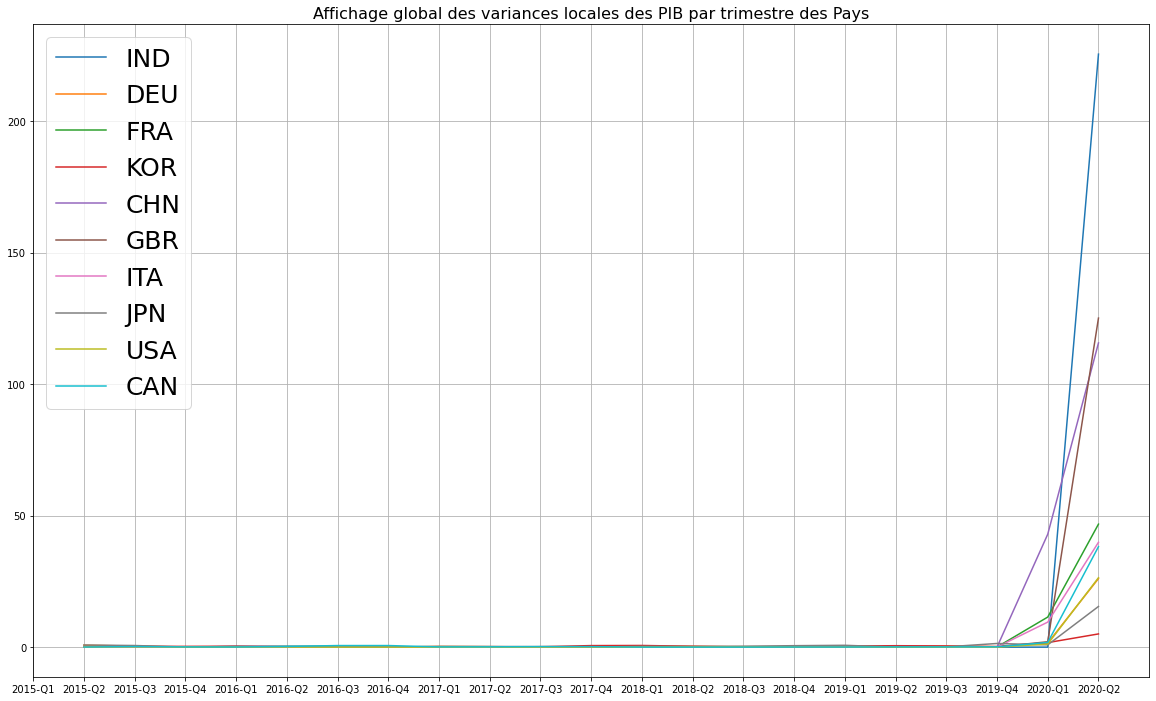

In [45]:
plt.figure(figsize=(20,12))
for d,vm,p in zip(listeDate,listeVariance, listePays) :
    plt.plot(d,vm,label=p)

plt.legend(prop={"size":25})
plt.title('Affichage global des variances locales des PIB par trimestre des Pays', fontsize=16)
plt.grid(True)
plt.show()

In [25]:
listeDate

[['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3',
  '2019-Q4',
  '2020-Q1',
  '2020-Q2'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q

In [37]:
listeAV2019Q4=[]
listeAP2019Q4=[]
avant2019Q4=0
for i in listeDate:
    index=i.index('2019-Q4') 
    listeAP2019Q4.append(i[index:])
    listeAV2019Q4.append(i[:index])
    avant2019Q4=len(i[:index])


In [38]:
listeAV2019Q4

[['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3'],
 ['2015-Q1',
  '2015-Q2',
  '2015-Q3',
  '2015-Q4',
  '2016-Q1',
  '2016-Q2',
  '2016-Q3',
  '2016-Q4',
  '2017-Q1',
  '2017-Q2',
  '2017-Q3',
  '2017-Q4',
  '2018-Q1',
  '2018-Q2',
  '2018-Q3',
  '2018-Q4',
  '2019-Q1',
  '2019-Q2',
  '2019-Q3'],
 ['2015-

In [39]:
listeAP2019Q4

[['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2'],
 ['2019-Q4', '2020-Q1', '2020-Q2']]

In [40]:
listeVarianceAV = []
listeVarianceAP = []
for i in listeVariance:
    listeVarianceAV.append(i[:avant2019Q4])
    listeVarianceAP.append(i[avant2019Q4:])

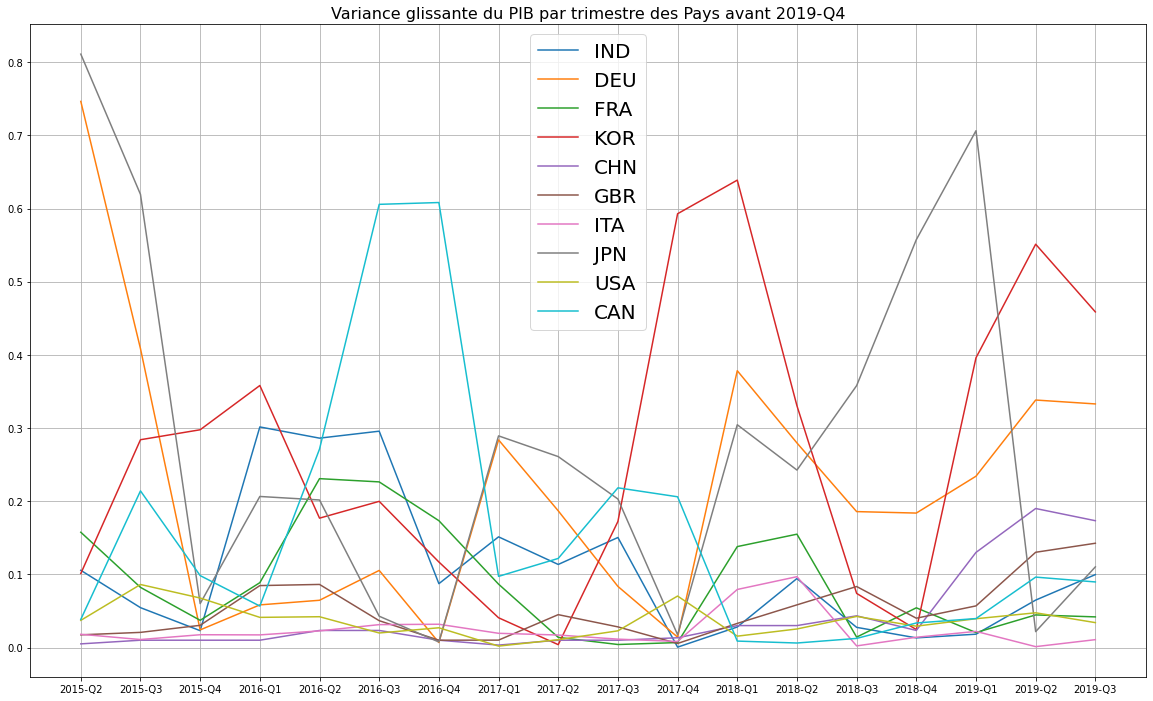

In [47]:
plt.figure(figsize=(20,12))
for d,var,p in zip(listeAV2019Q4,listeVarianceAV, listePays) :
    plt.plot(d,var,label=p)

plt.legend(prop={"size":20})
plt.title('Variance glissante du PIB par trimestre des Pays avant 2019-Q4', fontsize=16)
plt.grid(True)
plt.show()

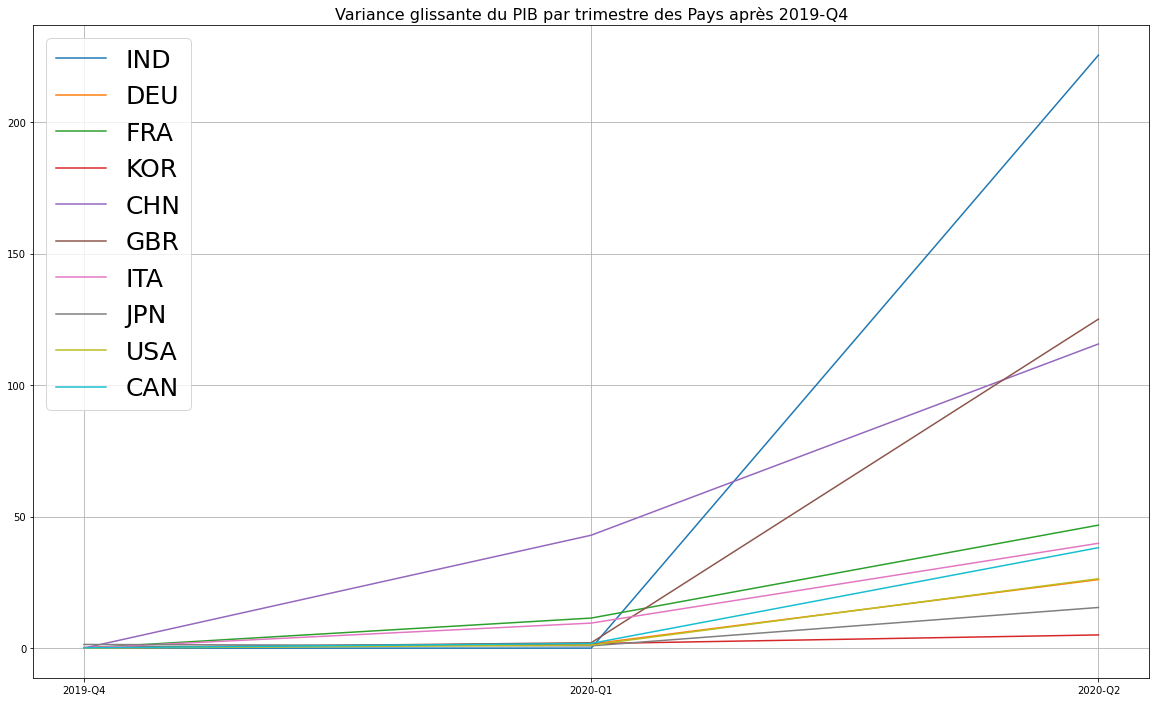

In [48]:
plt.figure(figsize=(20,12))
for d,var,p in zip(listeAP2019Q4,listeVarianceAP, listePays) :
    plt.plot(d,var,label=p)

plt.legend(prop={"size":25})
plt.title('Variance glissante du PIB par trimestre des Pays après 2019-Q4', fontsize=16)
plt.grid(True)
plt.show()